# Uczenie Maszynowe Część 1

------------

#### ZADANIA

------------

```



```

`Zadanie 1.`

***Zbiór danych dotyczy 3 gatunków irysów. Każdy irys jest opisany za pomocą 4 cech
(długość i szerokość kielicha, długość i szerokość płatka) + informacja o gatunku:***

1. Wczytanie Danych.

In [1]:
#pip install pandas

import pandas as pd

# Wczytanie danych
data = pd.read_csv('iris.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


2. Podstawowe statystyki.

In [2]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3. Kompletność danych.

In [3]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

4. Normalizacja danych w zakresie [0,1] na kolumnach.

In [4]:
#Dane z z wyłączeniem kolumny species
data_no_species = data.drop(columns='species')

#Wywietlenie danych z wyłączeniem kolumny species
data_no_species.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Za pomocą biblioteki scikit-learn:

In [5]:
#pip install scikit-learn

from sklearn.preprocessing import MinMaxScaler

scaleMinMax = MinMaxScaler(feature_range=(0, 1))

normalized_data_no_species_01 = pd.DataFrame(scaleMinMax.fit_transform(data_no_species), columns=data_no_species.columns)

##normalized_data_no_species.head()


# Dodanie kolumny 'species' do zbioru danych
normalized_data_no_species_01['species'] = data['species']
normalized_data_no_species_01.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


5. Normalizacja danych w zakresie [-1,1] na kolumnach.

- Za pomocą biblioteki scikit-learn:

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaleMinMax = MinMaxScaler(feature_range=(-1, 1))

normalized_data_no_species_11 = pd.DataFrame(scaleMinMax.fit_transform(data_no_species), columns=data_no_species.columns)

##normalized_data_no_species.head()


# Dodanie kolumny 'species' do zbioru danych
normalized_data_no_species_11['species'] = data['species']
normalized_data_no_species_11.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.555556,0.250000,-0.864407,-0.916667,setosa
1,-0.666667,-0.166667,-0.864407,-0.916667,setosa
2,-0.777778,0.000000,-0.898305,-0.916667,setosa
3,-0.833333,-0.083333,-0.830508,-0.916667,setosa
4,-0.611111,0.333333,-0.864407,-0.916667,setosa


6. Standaryzacja danych na kolumnach.

- Za pomocą biblioteki scikit-learn:

In [7]:
from sklearn.preprocessing import StandardScaler

scaleStandard = StandardScaler()

standardized_data_no_species = pd.DataFrame(scaleStandard.fit_transform(data_no_species), columns=data_no_species.columns)

#standardized_data_no_species.head()

# Dodanie kolumny 'species' do zbioru danych
standardized_data_no_species['species'] = data['species']
standardized_data_no_species.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa
3,-1.506521,0.106445,-1.284407,-1.312977,setosa
4,-1.021849,1.263460,-1.341272,-1.312977,setosa


7. Wykres zbiorczy z 4 wykresów, zależności długości płatka
[cm] od szerokości płatka [cm] różnicowany na podstawie gatunku dla danych
pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w zakresie [-
1,1] oraz standaryzowanych.

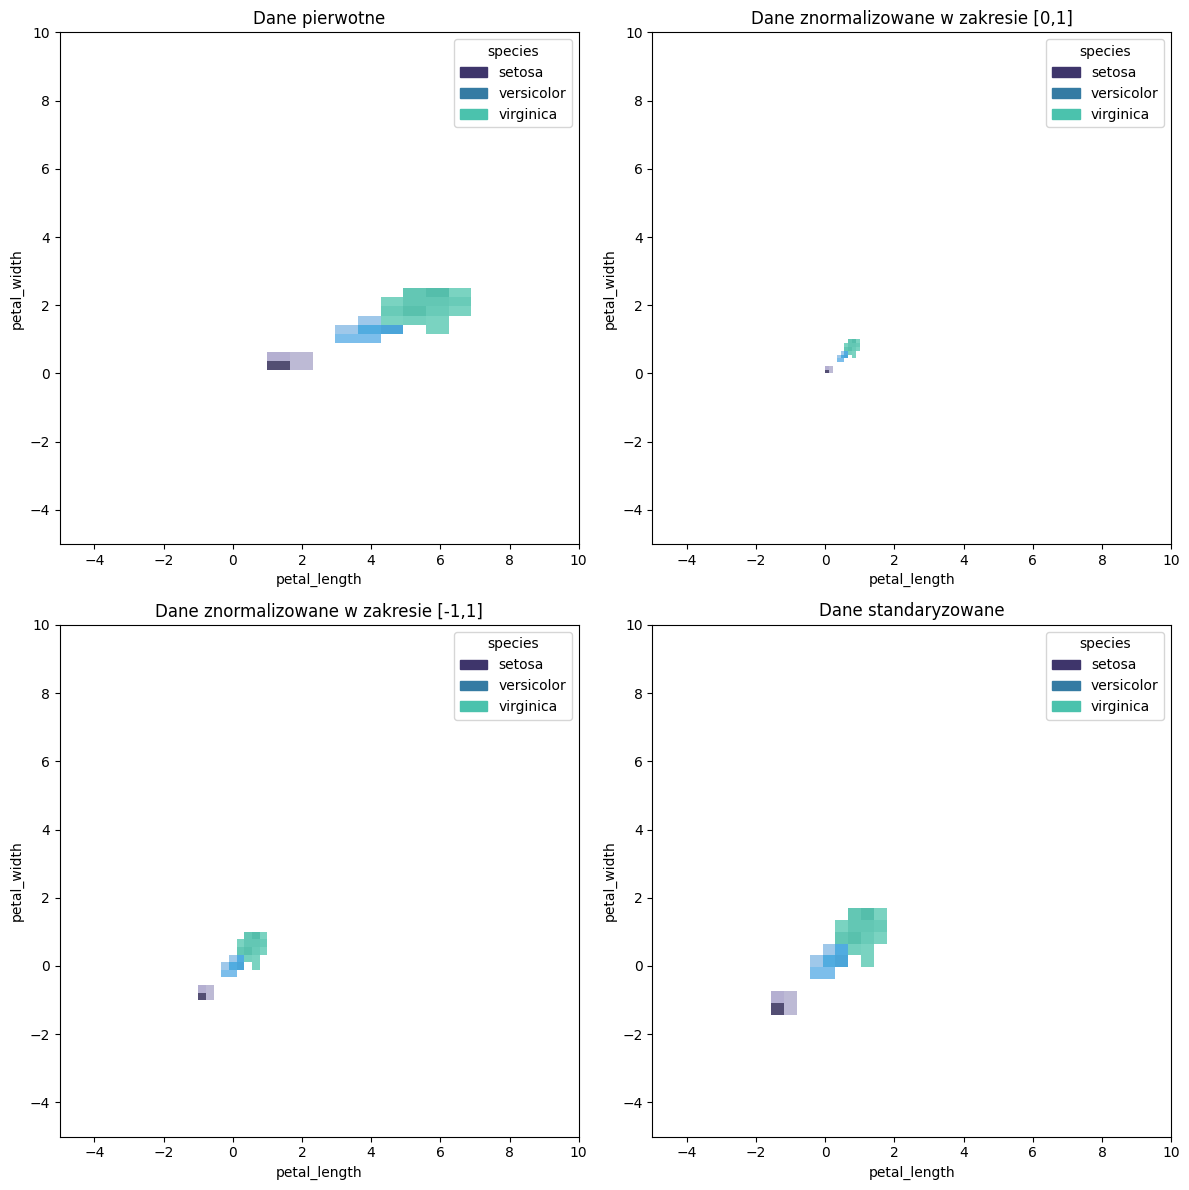

In [8]:
#pip install matplotlib
#pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
 
sns.histplot(x="petal_length", y="petal_width", data=data, hue="species", palette="mako", ax=axes[0, 0])
axes[0, 0].set_title("Dane pierwotne")
sns.histplot(x="petal_length", y="petal_width", data=normalized_data_no_species_01, hue="species", palette="mako", ax=axes[0, 1])
axes[0, 1].set_title("Dane znormalizowane w zakresie [0,1]")
sns.histplot(x="petal_length", y="petal_width", data=normalized_data_no_species_11, hue="species", palette="mako", ax=axes[1, 0])
axes[1, 0].set_title("Dane znormalizowane w zakresie [-1,1]")
sns.histplot(x="petal_length", y="petal_width", data=standardized_data_no_species, hue="species", palette="mako", ax=axes[1, 1])
axes[1, 1].set_title("Dane standaryzowane")

# Ustawienie tych samych zakresów dla wszystkich wykresów
for ax in axes.flat:
    ax.set_xlim([-5, 10])
    ax.set_ylim([-5, 10])

plt.tight_layout()
plt.show()

8. Wykres zbiorczy z 4 wykresów, zależności długości
kielicha [cm] od szerokości kielicha [cm] różnicowany na podstawie gatunku dla
danych pierwotnych, znormalizowanych w zakresie [0,1], znormalizowanych w
zakresie [-1,1] oraz standaryzowanych.

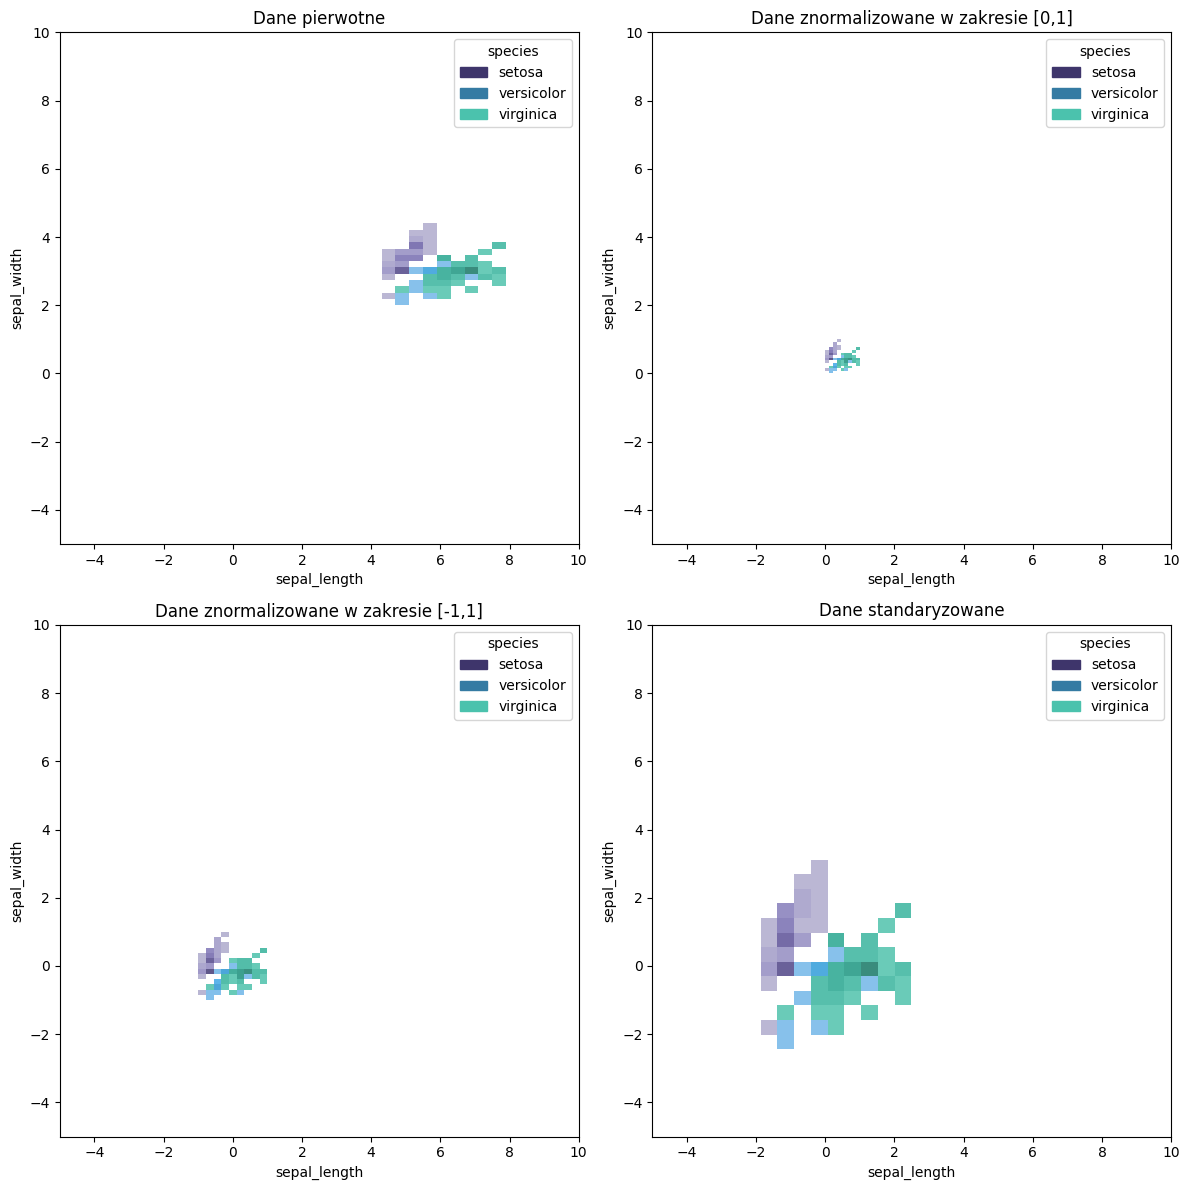

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

sns.histplot(x="sepal_length", y="sepal_width", data=data, hue="species", palette="mako", ax=axes[0, 0])
axes[0, 0].set_title("Dane pierwotne")
sns.histplot(x="sepal_length", y="sepal_width", data=normalized_data_no_species_01, hue="species", palette="mako", ax=axes[0, 1])
axes[0, 1].set_title("Dane znormalizowane w zakresie [0,1]")
sns.histplot(x="sepal_length", y="sepal_width", data=normalized_data_no_species_11, hue="species", palette="mako", ax=axes[1, 0])
axes[1, 0].set_title("Dane znormalizowane w zakresie [-1,1]")
sns.histplot(x="sepal_length", y="sepal_width", data=standardized_data_no_species, hue="species", palette="mako", ax=axes[1, 1])
axes[1, 1].set_title("Dane standaryzowane")

# Ustawienie tych samych zakresów dla wszystkich wykresów
for ax in axes.flat:
    ax.set_xlim([-5, 10])
    ax.set_ylim([-5, 10])

plt.tight_layout()
plt.show()

```



```

`Zadanie 2.`

***Zbiór danych dotyczy serii zarejestrowanych pomiarów w postaci widm Ramana w czasie.
Widmo Ramana to wykres intensywności rozproszonego promieniowania Ramana w
funkcji różnicy częstotliwości w stosunku do promieniowania padającego. W pierwszym
wierszu znajdują się jednostki (Wavenumber [cm^-1], Intensity [a.u.]), w drugim
oznaczenia kolejnych pomiarów, ti. Pierwsza kolumna odnosi się do zakresu pomiarowego,
w którym rejestrowane były widma (oś horyzontalna). Pozostałe kolumny odnoszą się do
poszczególnych pomiarów.***

- Wczytanie Danych

In [10]:
import pandas as pd

# Wczytanie danych
data_Raman_spectra = pd.read_csv('Zad2_L1.csv', delimiter=';')

data_Raman_spectra.head(1673)

,Wavenumber [cm^-1],Intensity [a.u.],Intensity [a.u.].1,Intensity [a.u.].2,Intensity [a.u.].3,Intensity [a.u.].4,Intensity [a.u.].5
0,NaN,t0,t1,t2,t3,t4,t5
1,"102,31954","0,006047782","0,007059473","0,009829081","0,010506542","0,009624989","0,012081773"
2,"103,2838","0,005960935","0,007119652","0,009688162","0,010243058","0,010030696","0,011808749"
3,"104,24806","0,005874101","0,007229843","0,009547255","0,009919582","0,010426411","0,011055735"
4,"105,21232","0,005577282","0,007010047","0,009466361","0,009616116","0,010232134","0,01021273"
...,...,...,...,...,...,...,...
1668,"1709,74221","0,002875747","-0,001142979","-2,82E-04","0,001310702","-1,06E-04","-0,001849615"
1669,"1710,70647","0,002517545","-0,001321855","3,40E-04","0,001549856","-3,56E-04","-0,001490155"
1670,"1711,67073","0,002019348","-0,001520726","0,00103143","0,001379013","-6,66E-04","-9,51E-04"
1671,"1712,63499","0,001691158","-0,001439592","0,001043187","9,88E-04","-0,001136541","-4,91E-04"


- Kompletność Danych

In [11]:
data_Raman_spectra.isnull().sum()

Wavenumber [cm^-1]    1
Intensity [a.u.]      0
Intensity [a.u.].1    0
Intensity [a.u.].2    0
Intensity [a.u.].3    0
Intensity [a.u.].4    0
Intensity [a.u.].5    0
dtype: int64

- Podstawowe Statystyki

In [12]:
data_Raman_spectra.describe()

,Wavenumber [cm^-1],Intensity [a.u.],Intensity [a.u.].1,Intensity [a.u.].2,Intensity [a.u.].3,Intensity [a.u.].4,Intensity [a.u.].5
count,1762,1763,1763,1763,1763,1763,1763
unique,1762,1762,1736,1762,1760,1754,1761
top,"1800,38272","6,72E-04","2,99E-04","6,94E-04","9,56E-04","7,48E-04","9,38E-04"
freq,1,2,2,2,2,3,2


- Przetworzenie Danych

In [13]:
# Zmiana przecinków na kropki
data_Raman_spectra = data_Raman_spectra.replace(',', '.', regex=True)

# Konwersja kolumn do odpowiednich typów numerycznych
data_Raman_spectra = data_Raman_spectra.apply(pd.to_numeric, errors='coerce')

#Wyświetlenie Danych
data_Raman_spectra.head(1675)

,Wavenumber [cm^-1],Intensity [a.u.],Intensity [a.u.].1,Intensity [a.u.].2,Intensity [a.u.].3,Intensity [a.u.].4,Intensity [a.u.].5
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102.31954,0.006048,0.007059,0.009829,0.010507,0.009625,0.012082
2,103.28380,0.005961,0.007120,0.009688,0.010243,0.010031,0.011809
3,104.24806,0.005874,0.007230,0.009547,0.009920,0.010426,0.011056
4,105.21232,0.005577,0.007010,0.009466,0.009616,0.010232,0.010213
...,...,...,...,...,...,...,...
1670,1711.67073,0.002019,-0.001521,0.001031,0.001379,-0.000666,-0.000951
1671,1712.63499,0.001691,-0.001440,0.001043,0.000988,-0.001137,-0.000491
1672,1713.59925,0.001573,-0.000838,0.000705,0.000757,-0.001627,-0.000212
1673,1714.56351,0.001495,0.000033,0.000667,0.000597,-0.001777,-0.000202


* Normalizacja

In [14]:
# Kolumna z liczbą falową (Wavenumber) = pierwsza kolumna, pomiary to pozostałe
wavenumber = data_Raman_spectra.iloc[:, 0]
intensity_spectra = data_Raman_spectra.iloc[:, 1:]

index_985 = (wavenumber - 985).abs().idxmin()

# Znormalizowanie każdego widma do aplitudy przy 985 cm-1
normalized_spectra = intensity_spectra / intensity_spectra.iloc[index_985]

normalized_spectra

,Intensity [a.u.],Intensity [a.u.].1,Intensity [a.u.].2,Intensity [a.u.].3,Intensity [a.u.].4,Intensity [a.u.].5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.327078,0.372432,0.474858,0.508954,0.495776,0.583300
2,0.322381,0.375607,0.468050,0.496190,0.516674,0.570119
3,0.317685,0.381420,0.461242,0.480520,0.537057,0.533764
4,0.301632,0.369825,0.457334,0.465820,0.527050,0.493064
...,...,...,...,...,...,...
1758,0.138403,-0.017515,0.112833,0.114121,0.023231,0.040313
1759,0.115830,-0.022158,0.136144,0.124279,-0.012311,0.015691
1760,0.104614,-0.011501,0.129503,0.125718,-0.062785,0.018588
1761,0.101512,0.015510,0.100639,0.091796,-0.073072,0.050936


2. Wykres zbiorczy składający się z 2 wykresów: widma dla danych
surowych oraz widma znormalizowane.

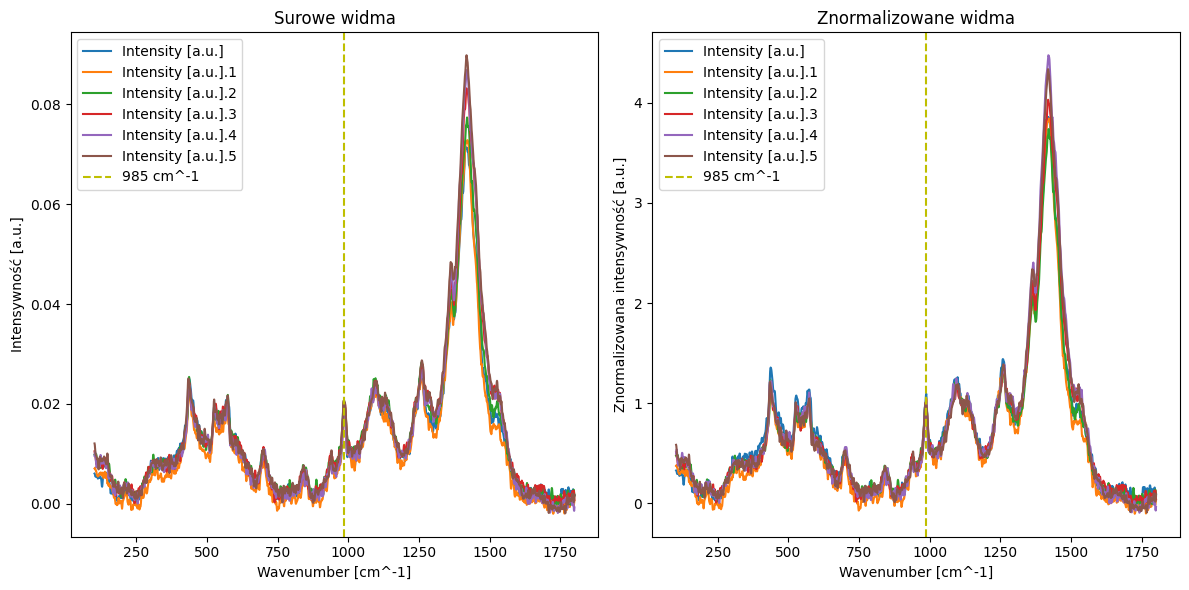

In [15]:
# Rysowanie wykresów
plt.figure(figsize=(12, 6))

# Wykres surowy
plt.subplot(1, 2, 1)
for col in intensity_spectra.columns:
    plt.plot(wavenumber, intensity_spectra[col], label=col)
plt.title('Surowe widma')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Intensywność [a.u.]')
plt.axvline(x=985, color='y', linestyle='--', label='985 cm^-1')
plt.legend()

# Wykres znormalizowany
plt.subplot(1, 2, 2)
for col in normalized_spectra.columns:
    plt.plot(wavenumber, normalized_spectra[col], label=col)
plt.title('Znormalizowane widma')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Znormalizowana intensywność [a.u.]')
plt.axvline(x=985, color='y', linestyle='--', label='985 cm^-1')
plt.legend()
    
plt.tight_layout()
plt.show()

```



```

`Zadanie 3.`

***Zbiór danych dotyczy serii zarejestrowanych pomiarów w postaci widm FTIR w czasie.
Widmo w podczerwieni obrazuje intensywność widma w podczerwieni. Pierwsza kolumna
odnosi się do zakresu pomiarowego (oś pozioma), w którym rejestrowane były widma
(Wavenumber [cm^-1]). Pozostałe kolumny (Absorbance [a.u.])) odnoszą się do widm
rejestrowanych po upływie określonego czasu (oś wertykalna).***

1. Wczytanie Danych.

In [16]:
import pandas as pd

# Wczytanie danych
data_FTIR_spectra = pd.read_csv('Zad3_L1.csv', delimiter=';')


# Zmiana przecinków na kropki
data_FTIR_spectra = data_FTIR_spectra.replace(',', '.', regex=True)

# Konwersja kolumn do odpowiednich typów numerycznych
data_FTIR_spectra = data_FTIR_spectra.apply(pd.to_numeric, errors='coerce')

data_FTIR_spectra


,Wavenumber [cm^-1],3 min,30 min,60 min,90 min,120 min,150 min,180 min,300 min,360 min,1800 min
0,525.0251,-0.009406,-0.004727,-0.008923,0.000000,-0.010655,0.000000,-0.001319,0.000000,0.000000,0.000000
1,525.2661,-0.007316,-0.004123,-0.008593,0.000155,-0.010266,0.000538,-0.001846,0.000744,0.000147,-0.000066
2,525.5072,-0.005362,-0.003581,-0.008142,0.000257,-0.009673,0.001312,-0.002225,0.001452,0.000452,-0.000073
3,525.7482,-0.004040,-0.003063,-0.007549,0.000304,-0.008918,0.001741,-0.002328,0.002208,0.000884,0.000012
4,525.9893,-0.003421,-0.002554,-0.006850,0.000467,-0.008159,0.001232,-0.002201,0.003054,0.001383,0.000210
...,...,...,...,...,...,...,...,...,...,...,...
12341,3998.9170,0.000440,0.001010,-0.000094,-0.000734,-0.000211,-0.000945,0.001301,0.000783,0.000785,0.000389
12342,3999.1580,0.000111,0.000668,-0.000084,-0.000518,-0.000085,-0.000773,0.001047,0.000680,0.000552,0.000406
12343,3999.3990,-0.000225,0.000341,-0.000055,-0.000296,-0.000008,-0.000537,0.000712,0.000490,0.000313,0.000338
12344,3999.6400,-0.000500,0.000102,-0.000021,-0.000111,0.000021,-0.000265,0.000345,0.000246,0.000115,0.000194


- Kompletność Danych

In [17]:
data_FTIR_spectra.isnull().sum()

Wavenumber [cm^-1]    0
3 min                 0
30 min                0
60 min                0
90 min                0
120 min               0
150 min               0
180 min               0
300 min               0
360 min               0
1800 min              0
dtype: int64

- Podstawowe Statystyki

In [18]:
data_FTIR_spectra.describe()

,Wavenumber [cm^-1],3 min,30 min,60 min,90 min,120 min,150 min,180 min,300 min,360 min,1800 min
count,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000,12346.000000
mean,2281.206607,0.179498,0.190993,0.221296,0.208670,0.179852,0.194761,0.199861,0.161674,0.102946,0.033241
std,1081.321592,0.319190,0.325230,0.380042,0.353122,0.298570,0.329951,0.332554,0.265014,0.167381,0.072737
min,525.025100,-0.009406,-0.004727,-0.009098,-0.008311,-0.010655,-0.011999,-0.008306,-0.009573,-0.005310,-0.003590
25%,1268.991250,0.002568,0.003127,0.002409,0.001605,0.002999,0.000055,0.002910,0.001994,0.001131,0.000276
50%,2511.948500,0.033473,0.029341,0.031772,0.030471,0.027367,0.029106,0.032072,0.026758,0.018709,0.002768
75%,3255.914750,0.152599,0.196887,0.217650,0.205579,0.179797,0.192809,0.200019,0.171597,0.115320,0.031712
max,3999.881000,1.113327,1.138600,1.725595,1.460928,1.192358,1.381568,1.360834,1.089943,0.678737,0.519852


In [19]:
# Normalizacja do pola powierzchni pod wykresem
wavenumbers_FTIR = data_FTIR_spectra.iloc[:, 0]  # Pierwsza kolumna z wavenumber
time_FTIR = data_FTIR_spectra.iloc[:, 1:]      # Pozostałe kolumny z danymi

# Obliczenie powierzchni pod wykresem (pole całkowite)
area = time_FTIR.sum(axis=0) * (wavenumbers_FTIR[1] - wavenumbers_FTIR[0])  # Zakładając stały krok

# Normalizacja widm
normalized_spectra_FTIR = time_FTIR / area

normalized_spectra_FTIR

,3 min,30 min,60 min,90 min,120 min,150 min,180 min,300 min,360 min,1800 min
0,-1.761219e-05,-8.317393e-06,-1.355113e-05,0.000000e+00,-1.991151e-05,0.000000e+00,-2.218424e-06,0.000000e+00,0.000000e+00,0.000000e+00
1,-1.369866e-05,-7.256009e-06,-1.305057e-05,2.496480e-07,-1.918463e-05,9.284041e-07,-3.104067e-06,1.546641e-06,4.799144e-07,-6.663019e-07
2,-1.003945e-05,-6.300631e-06,-1.236626e-05,4.139325e-07,-1.807668e-05,2.264587e-06,-3.741145e-06,3.017788e-06,1.475655e-06,-7.370775e-07
3,-7.564473e-06,-5.390751e-06,-1.146426e-05,4.896322e-07,-1.666571e-05,3.004815e-06,-3.914086e-06,4.589255e-06,2.886016e-06,1.253739e-07
4,-6.405651e-06,-4.494315e-06,-1.040389e-05,7.521652e-07,-1.524593e-05,2.126185e-06,-3.700574e-06,6.347798e-06,4.514424e-06,2.123268e-06
...,...,...,...,...,...,...,...,...,...,...
12341,8.238536e-07,1.777984e-06,-1.426094e-07,-1.182204e-06,-3.942969e-07,-1.630747e-06,2.188473e-06,1.627715e-06,2.562808e-06,3.933102e-06
12342,2.078358e-07,1.175480e-06,-1.275739e-07,-8.343075e-07,-1.588400e-07,-1.333934e-06,1.760860e-06,1.413597e-06,1.802127e-06,4.104986e-06
12343,-4.212888e-07,6.000581e-07,-8.413801e-08,-4.767471e-07,-1.468803e-08,-9.266785e-07,1.197316e-06,1.018621e-06,1.021858e-06,3.417451e-06
12344,-9.361973e-07,1.794895e-07,-3.219722e-08,-1.787802e-07,3.942969e-08,-4.572994e-07,5.801601e-07,5.113894e-07,3.754432e-07,1.961496e-06


2. Wykres zbiorczy składający się z 2 wykresów: widma dla danych
surowych oraz widma znormalizowane.

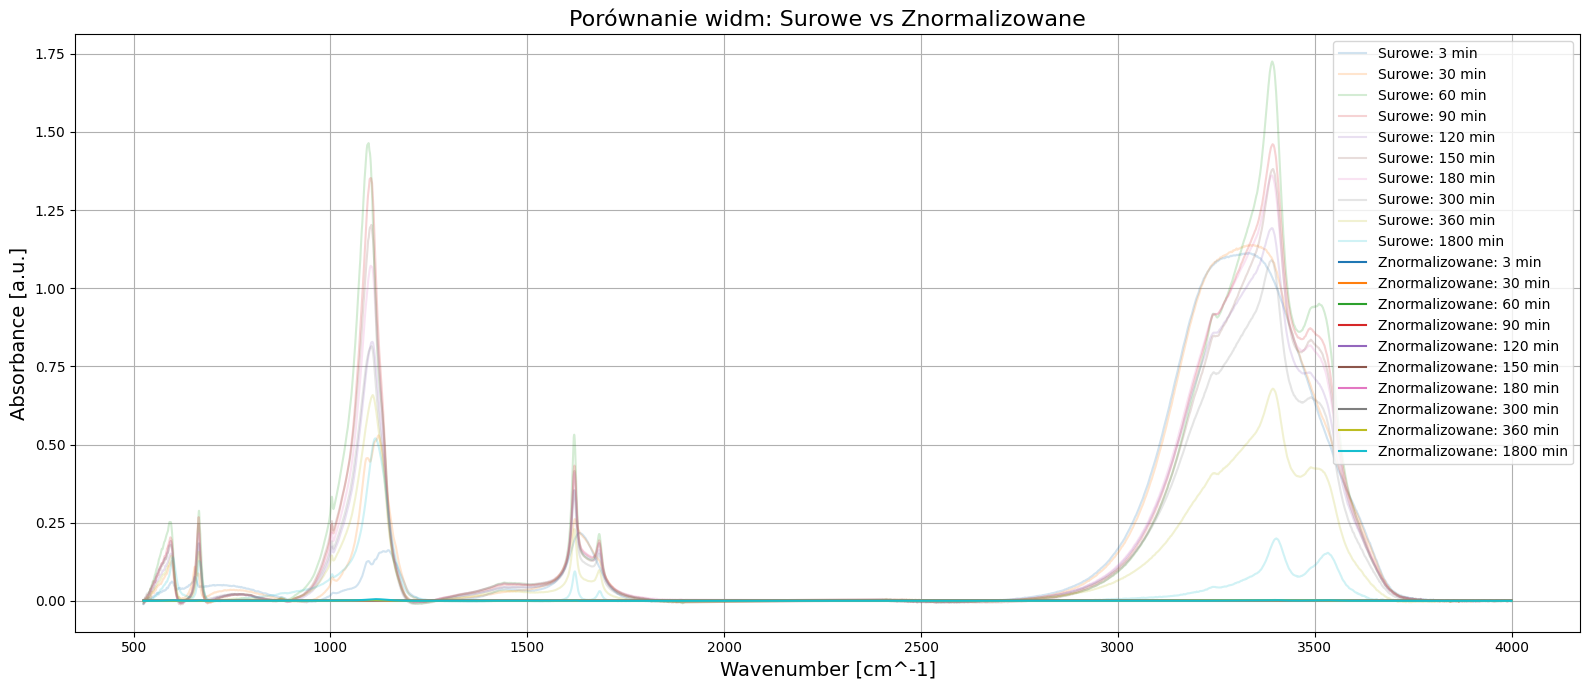

In [20]:
# Ustawienia dla wykresu
plt.figure(figsize=(16, 7))

# Wykres surowy
for col in time_FTIR.columns:
    plt.plot(wavenumbers_FTIR, time_FTIR[col], label=f'Surowe: {col}', alpha=0.2)

# Wykres znormalizowany
for col in normalized_spectra_FTIR.columns:
    plt.plot(wavenumbers_FTIR, normalized_spectra_FTIR[col], label=f'Znormalizowane: {col}')

# Ustawienia tytułu i osi
plt.title('Porównanie widm: Surowe vs Znormalizowane', fontsize=16)
plt.xlabel('Wavenumber [cm^-1]', fontsize=14)
plt.ylabel('Absorbance [a.u.]', fontsize=14)
plt.grid(True)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

In [21]:
# Funkcja do numerycznego obliczania całki metodą trapezów
def trapezoidal_integration(y, x):
    area = 0.0
    for i in range(1, len(x)):
        dx = x[i] - x[i - 1]
        avg_height = (y[i] + y[i - 1]) / 2
        area += dx * avg_height
    return area

# Normalizacja względem pola powierzchni pod wykresem
normalized_FTIR = data_FTIR_spectra.copy()

for col in normalized_FTIR.columns[1:]:
    x = normalized_FTIR['Wavenumber [cm^-1]']
    y = normalized_FTIR[col]
    area = trapezoidal_integration(y, x)
    normalized_FTIR[col] = normalized_FTIR[col] / area

normalized_FTIR


,Wavenumber [cm^-1],3 min,30 min,60 min,90 min,120 min,150 min,180 min,300 min,360 min,1800 min
0,525.0251,-1.760375e-05,-8.299137e-06,-1.355932e-05,0.000000e+00,-1.986070e-05,0.000000e+00,-2.213038e-06,0.000000e+00,0.000000e+00,0.000000e+00
1,525.2661,-1.369209e-05,-7.240083e-06,-1.305845e-05,2.499070e-07,-1.913567e-05,9.288513e-07,-3.096529e-06,1.547609e-06,4.799553e-07,-6.655112e-07
2,525.5072,-1.003464e-05,-6.286802e-06,-1.237373e-05,4.143618e-07,-1.803055e-05,2.265677e-06,-3.732060e-06,3.019676e-06,1.475781e-06,-7.362029e-07
3,525.7482,-7.560846e-06,-5.378919e-06,-1.147119e-05,4.901401e-07,-1.662318e-05,3.006262e-06,-3.904582e-06,4.592125e-06,2.886262e-06,1.252252e-07
4,525.9893,-6.402581e-06,-4.484451e-06,-1.041018e-05,7.529455e-07,-1.520702e-05,2.127209e-06,-3.691588e-06,6.351769e-06,4.514809e-06,2.120749e-06
...,...,...,...,...,...,...,...,...,...,...,...
12341,3998.9170,8.234587e-07,1.774082e-06,-1.426956e-07,-1.183430e-06,-3.932907e-07,-1.631532e-06,2.183159e-06,1.628733e-06,2.563026e-06,3.928435e-06
12342,3999.1580,2.077362e-07,1.172900e-06,-1.276510e-07,-8.351729e-07,-1.584346e-07,-1.334576e-06,1.756584e-06,1.414481e-06,1.802281e-06,4.100115e-06
12343,3999.3990,-4.210868e-07,5.987410e-07,-8.418887e-08,-4.772417e-07,-1.465055e-08,-9.271248e-07,1.194408e-06,1.019258e-06,1.021946e-06,3.413396e-06
12344,3999.6400,-9.357485e-07,1.790955e-07,-3.221668e-08,-1.789656e-07,3.932907e-08,-4.575197e-07,5.787513e-07,5.117093e-07,3.754752e-07,1.959168e-06


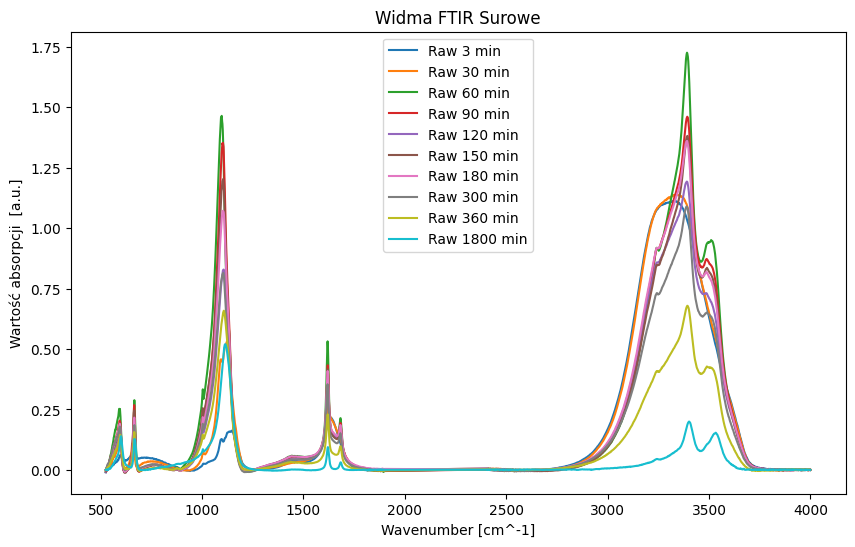

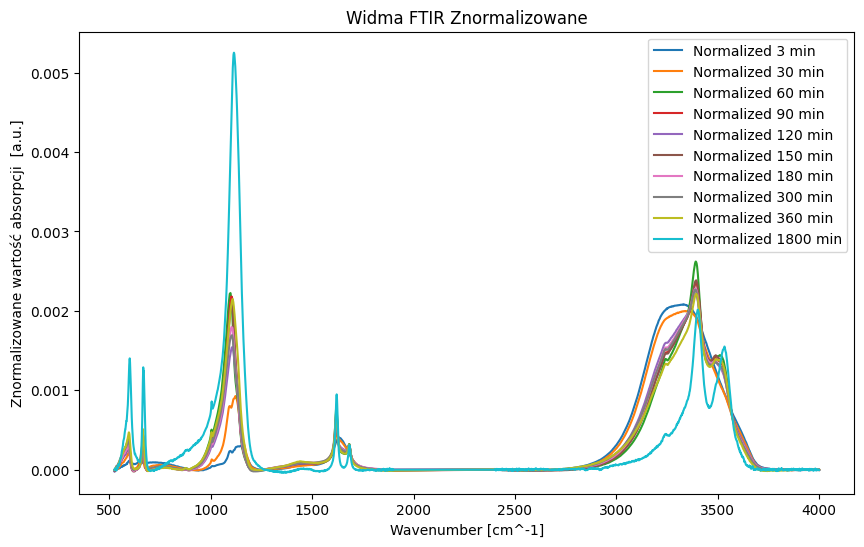

In [22]:
# Wykres surowych widm FTIR
plt.figure(figsize=(10, 6))
for col in data_FTIR_spectra.columns[1:]:
    plt.plot(data_FTIR_spectra['Wavenumber [cm^-1]'], data_FTIR_spectra[col], label=f'Raw {col}')
plt.title('Widma FTIR Surowe')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Wartość absorpcji  [a.u.]')
plt.legend()
plt.show()

# Wykres znormalizowanych widm FTIR
plt.figure(figsize=(10, 6))
for col in normalized_FTIR.columns[1:]:
    plt.plot(normalized_FTIR['Wavenumber [cm^-1]'], normalized_FTIR[col], label=f'Normalized {col}')
plt.title('Widma FTIR Znormalizowane')
plt.xlabel('Wavenumber [cm^-1]')
plt.ylabel('Znormalizowane wartość absorpcji  [a.u.]')
plt.legend()
plt.show()